In [4]:
import pandas

# Establish Metadata
metadata = {
    'Author      ': 'Jay Annadurai',
    'Date        ': '15 Feb 2024',
    'Project     ': 'A3-DataAnalyzer',
    'Version     ': 0.1,
    'Description ': ''
}

In [5]:
# Import Libraries
import pandas as pd  # Data Reading
import seaborn as sns  # Advanced Data Visualization
import numpy as np # Computation
import matplotlib.pyplot as plt  # Data Visualization

# Allows for Interactive Python Plots:
# %matplotlib notebook 
# Allows for Static Python Plots:
%matplotlib inline 

# Data Analysis Task

## 1. Data Merging and Preparation
During data analysis it is often necessary to take information from multiple files in order to perform data analysis or make sense of your data analysis.

a. Load the data in “Gene_Expression_Data.xlsx”, “Gene_Information.csv”, and “Sample_Information.tsv” into Python.

In [6]:
files = [
    "Gene_Expression_Data.xlsx",
    "Gene_Information.csv",
    "Sample_Information.tsv"
]

input_folder_path = "Data/"

def file_to_df(file_path:str, return_dict=True) -> dict:
    # Get the File Extension by splitting on '.'
    file_path_list = file_path.rsplit(".",1)
    # Will have the path pre-extension and the extension as a list
    
    # Get the File Name by splitting on the last '/' with the part that doesn't have the ext
    file_name = file_path_list[0].rsplit("/",1)[1]
    
    # Save the Information
    file_dict = {'name': file_name, 'extension': file_path_list[1]}
    
    # Parse the File based on its extension
    if file_dict['extension'] == 'xlsx':
        df = pd.read_excel(file_path)
    elif file_dict['extension'] == 'tsv':
        df = pd.read_csv(file_path, sep='\t')
    elif file_dict['extension'] == 'csv':
        df = pd.read_csv(file_path, sep=',')
    else:
        raise TypeError("Unsupported file extension")
    
    # If the return_dict flag is enabled, return a dictionary including the name of the file
    if return_dict: return {"name": file_dict['name'],"ext": file_dict['extension'],"path": file_path, "df": df}
    
    # Return the Dataframe
    else: return df
        

In [7]:
# Initialize a Dict of Dataframes
dfs = {}

# Iterate through each file and import the Dataframes
for file in files:
    # Get the Dataframe as a Dict
    dict_df = file_to_df(input_folder_path + file)

    # Debug: Print the Dict with the DF
    # print(dict_df)
    
    # Binds the Dataframe under the file name under the Dataframes Dictionary
    dfs[dict_df['name']] = dict_df['df'] 

In [8]:
# View the Dataframe
dfs['Gene_Expression_Data']

,Probe_ID,GSM820516,GSM820517,GSM820518,GSM820519,GSM820520,GSM820521,GSM820522,GSM820523,GSM820524,GSM820525,GSM820526,GSM820527,GSM820528,GSM820529,GSM820530,GSM820531,GSM820532,GSM820533
0,ILMN_1343291,66665.3800,69404.6700,64128.0700,68943.9700,67827.2200,71775.3000,62245.5900,69713.7000,69509.2700,68244.5900,65427.4700,68436.5200,57608.6700,69959.7700,69509.2700,70063.7700,69647.1700,70332.3400
1,ILMN_1343295,22040.1100,13046.3400,38678.9600,16641.8900,33719.8900,18933.2900,26170.0400,9906.9130,17166.5200,12428.9500,25297.5700,17535.6000,19749.1400,17854.2900,43670.6800,22849.0800,23725.6600,28747.0100
2,ILMN_1651199,226.6081,205.4483,217.2475,229.0451,226.3029,203.8710,213.4431,210.4129,229.5394,212.7384,226.1345,232.2437,208.7316,229.2948,214.4033,216.6758,195.6539,252.1502
3,ILMN_1651209,278.5710,253.7044,211.8002,278.0423,259.8059,265.1900,321.2587,273.4458,253.6032,310.1582,275.0126,274.9519,250.6420,255.8540,219.5752,292.4965,253.3126,237.9844
4,ILMN_1651210,195.4914,195.9835,175.3356,193.9065,229.5674,164.0632,244.6696,190.9813,188.1039,199.3084,220.6229,213.3975,194.7746,173.7073,185.3380,174.6898,195.3534,191.9382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48798,ILMN_2415911,965.4537,1084.3610,975.9432,692.3060,1306.9460,947.1885,837.6633,587.1460,833.9681,852.5927,1234.8830,716.9376,1254.8400,835.5988,1034.8450,731.5306,1104.9090,686.2645
48799,ILMN_2415926,3583.4440,1152.4940,2049.1500,913.1962,1996.2160,1336.6350,1693.9640,902.1262,2569.1790,1317.9910,3384.6820,1741.8400,1978.3250,1048.7180,2644.4420,1294.8670,1705.6710,2486.7550
48800,ILMN_2415949,2282.5570,822.8831,2359.0100,1630.6520,2951.5930,2222.9580,2120.2090,1810.6850,1535.9080,977.6974,1849.7140,1922.0240,2400.9900,1626.1940,2502.9950,1918.5350,1135.9280,2230.4140
48801,ILMN_2415979,2389.5440,3323.9100,2554.8810,9655.9170,4155.8250,5872.2260,3631.8960,6146.9280,2984.1830,4123.6540,5451.1860,7398.6830,2048.6720,3455.2030,2476.3410,4164.1320,2756.0150,4462.6400


In [9]:
# View the Dataframe
dfs['Gene_Information']

,Probe_ID,Symbol,Entrez_Gene_ID,Chromosome,Cytoband
0,ILMN_1343291,EEF1A1,1915.0,6,6q13c
1,ILMN_1343295,GAPDH,2597.0,12,12p13.31d
2,ILMN_1651199,LOC643334,643334.0,NaN,2q37.3b
3,ILMN_1651209,SLC35E2,9906.0,1,1p36.33a
4,ILMN_1651210,DUSP22,56940.0,NaN,6p25.3b
...,...,...,...,...,...
48798,ILMN_2415911,ENOX2,10495.0,X,Xq25h-q26.1a
48799,ILMN_2415926,THOC3,84321.0,5,5q35.2c
48800,ILMN_2415949,MRRF,92399.0,9,9q33.2b
48801,ILMN_2415979,KIAA1751,85452.0,1,1p36.33a


In [10]:
# View the Dataframes
dfs['Sample_Information']

,group,patient
GSM820516,tumor,patient: 1
GSM820517,normal,patient: 1
GSM820518,tumor,patient: 2
GSM820519,normal,patient: 2
GSM820520,tumor,patient: 3
GSM820521,normal,patient: 3
GSM820522,tumor,patient: 4
GSM820523,normal,patient: 4
GSM820524,tumor,patient: 5
GSM820525,normal,patient: 5


b. Change the sample names from the “Gene_Expression_Data.xlsx”, based upon the phenotype presented in “Sample_Information.tsv”.



In [11]:
# Convert the Gene_Expression_Data df from Wide Form to Long Form
gene_exp_df = dfs['Gene_Expression_Data'].melt(
    # Name of the Rows
    id_vars='Probe_ID',
    # Grab all the Columns After the Probe ID to Melt into a 'Column of Columns'
    value_vars= dfs['Gene_Expression_Data'].iloc[:, 1:],
    # Name of the Column of Columns
    var_name='Sample_Name',
    # Name of Values
    value_name='Gene_Expression'
)

print(gene_exp_df.head(11))

        Probe_ID Sample_Name  Gene_Expression
0   ILMN_1343291   GSM820516       66665.3800
1   ILMN_1343295   GSM820516       22040.1100
2   ILMN_1651199   GSM820516         226.6081
3   ILMN_1651209   GSM820516         278.5710
4   ILMN_1651210   GSM820516         195.4914
5   ILMN_1651221   GSM820516         217.2764
6   ILMN_1651228   GSM820516       17556.5200
7   ILMN_1651229   GSM820516         547.4667
8   ILMN_1651230   GSM820516         227.9082
9   ILMN_1651232   GSM820516         304.5083
10  ILMN_1651235   GSM820516         245.1882


In [12]:
# Prepare the Sample_Information df by Resetting the Index
sample_info_df = dfs['Sample_Information'].reset_index(drop=False)

# The index column is now non-indexed and under the column name 'index', it must be renamed
sample_info_df = sample_info_df.rename(columns={'index': 'Sample_Name', 'group': 'Group', 'patient': 'Patient'})

# Standardize the Patient Column into Only the Patient Number
# In a Pandas DF, string operations are performed directly on the series with 'str.method'
# The second element within that string within the series is selected with str.get(1)
sample_info_df['Patient_Number'] = sample_info_df['Patient'].str.rsplit(':',n=1).str.get(1).astype(int)

# Now drop the original Patients Column
sample_info_df = sample_info_df.drop(columns=['Patient'],inplace=False)

print(sample_info_df.head(11))

   Sample_Name   Group  Patient_Number
0    GSM820516   tumor               1
1    GSM820517  normal               1
2    GSM820518   tumor               2
3    GSM820519  normal               2
4    GSM820520   tumor               3
5    GSM820521  normal               3
6    GSM820522   tumor               4
7    GSM820523  normal               4
8    GSM820524   tumor               5
9    GSM820525  normal               5
10   GSM820526   tumor               6


In [13]:
# Merge the Dataframes on Sample Name
# Do an Inner Join just in case
gene_exp_df = pd.merge(gene_exp_df, sample_info_df, how='inner',on='Sample_Name')

print(gene_exp_df.head(11))

        Probe_ID Sample_Name  Gene_Expression  Group  Patient_Number
0   ILMN_1343291   GSM820516       66665.3800  tumor               1
1   ILMN_1343295   GSM820516       22040.1100  tumor               1
2   ILMN_1651199   GSM820516         226.6081  tumor               1
3   ILMN_1651209   GSM820516         278.5710  tumor               1
4   ILMN_1651210   GSM820516         195.4914  tumor               1
5   ILMN_1651221   GSM820516         217.2764  tumor               1
6   ILMN_1651228   GSM820516       17556.5200  tumor               1
7   ILMN_1651229   GSM820516         547.4667  tumor               1
8   ILMN_1651230   GSM820516         227.9082  tumor               1
9   ILMN_1651232   GSM820516         304.5083  tumor               1
10  ILMN_1651235   GSM820516         245.1882  tumor               1


c. Split the merged data from part c, into 2 parts, based upon their labeled phenotype (i.e. tumor or normal)

In [14]:
# Define Phenotypes to Split the Dataframes 
phenotypes = ['Tumor','Normal']
phenotype_dfs = {}

# Split the Dataframes into Several Dataframes based on the Group Phenotype
for phenotype in phenotypes:
    phenotype_dfs[phenotype] = gene_exp_df[gene_exp_df['Group'] == phenotype.lower()].reset_index(drop=True)
    print(f"Group '{phenotype}': \n {phenotype_dfs[phenotype].head(5)} \n\n")

Group 'Tumor': 
        Probe_ID Sample_Name  Gene_Expression  Group  Patient_Number
0  ILMN_1343291   GSM820516       66665.3800  tumor               1
1  ILMN_1343295   GSM820516       22040.1100  tumor               1
2  ILMN_1651199   GSM820516         226.6081  tumor               1
3  ILMN_1651209   GSM820516         278.5710  tumor               1
4  ILMN_1651210   GSM820516         195.4914  tumor               1 


Group 'Normal': 
        Probe_ID Sample_Name  Gene_Expression   Group  Patient_Number
0  ILMN_1343291   GSM820517       69404.6700  normal               1
1  ILMN_1343295   GSM820517       13046.3400  normal               1
2  ILMN_1651199   GSM820517         205.4483  normal               1
3  ILMN_1651209   GSM820517         253.7044  normal               1
4  ILMN_1651210   GSM820517         195.9835  normal               1 



d. Compute the average expression for all genes from the 2 data sets from part d

In [15]:
# Initialize a dict to hold the Average Gene Expression DFs
avg_exp_phenotype_dfs = {}

# Iterate through the Phenotype DFs
for phenotype in phenotype_dfs:
    # Group the Elements by the Probe_ID, get the Gene_Expression Column, and then apply the mean calculation across groups
    avg_exp_df = phenotype_dfs[phenotype].groupby('Probe_ID')['Gene_Expression'].mean().reset_index()
    
    # Rename the Column of the Average Expression to Reflect that it's the Average Expression
    avg_exp_df.rename(columns={'Gene_Expression': 'Gene_Exp_Avg'},inplace=True)

    # Attach the DF to the Dictionary of DFs
    avg_exp_phenotype_dfs[phenotype] = avg_exp_df
    
    print(f"Phenotype: {phenotype}\n{avg_exp_df.head(5)}\n\n")



Phenotype: Tumor
       Probe_ID  Gene_Exp_Avg
0  ILMN_1343291  65840.901111
1  ILMN_1343295  27802.063333
2  ILMN_1651199    217.562700
3  ILMN_1651209    258.175711
4  ILMN_1651210    203.250756


Phenotype: Normal
       Probe_ID  Gene_Exp_Avg
0  ILMN_1343291  69652.736667
1  ILMN_1343295  17549.262556
2  ILMN_1651199    221.320022
3  ILMN_1651209    271.314167
4  ILMN_1651210    188.663967



e. Determine the fold change for each Probe between the two groups ((Tumour – Control) / Control)

In [16]:
# Merge the Two Dataframes into One for the sake of Quantitative Comparison
phenotype_comparison_df = pd.merge(
    # The DFs to Merge
    avg_exp_phenotype_dfs['Tumor'],
    avg_exp_phenotype_dfs['Normal'],
    # Inner Join to only compare Probes that have values in both
    how='inner',
    # Merge on the Probe ID column
    on='Probe_ID',
    # Rename the Column with Prefixes
    # Note, this requires a Tuple and not a List
    suffixes = ('_Tumor', '_Normal')
)

# Print the DF Head to Validate Operations
print(phenotype_comparison_df.head())

       Probe_ID  Gene_Exp_Avg_Tumor  Gene_Exp_Avg_Normal
0  ILMN_1343291        65840.901111         69652.736667
1  ILMN_1343295        27802.063333         17549.262556
2  ILMN_1651199          217.562700           221.320022
3  ILMN_1651209          258.175711           271.314167
4  ILMN_1651210          203.250756           188.663967


In [17]:
# Add a Column with the Fold Change Computation ( (Condition - Control) / (Control) )
condition = phenotype_comparison_df['Gene_Exp_Avg_Tumor']
control =  phenotype_comparison_df['Gene_Exp_Avg_Normal']

# Note, the provided Fold Change Computation cannot describe symmetry well
phenotype_comparison_df['Fold_Change'] = (condition - control) / control
phenotype_comparison_df['log_Fold_Change'] = np.log2( condition  / control )

# Print the DF to Validate Operations
phenotype_comparison_df

,Probe_ID,Gene_Exp_Avg_Tumor,Gene_Exp_Avg_Normal,Fold_Change,log_Fold_Change
0,ILMN_1343291,65840.901111,69652.736667,-0.054726,-0.081196
1,ILMN_1343295,27802.063333,17549.262556,0.584230,0.663782
2,ILMN_1651199,217.562700,221.320022,-0.016977,-0.024703
3,ILMN_1651209,258.175711,271.314167,-0.048425,-0.071611
4,ILMN_1651210,203.250756,188.663967,0.077316,0.107442
...,...,...,...,...,...
48798,ILMN_2415911,1061.050144,792.658411,0.338597,0.420722
48799,ILMN_2415926,2400.563667,1354.958044,0.771689,0.825125
48800,ILMN_2415949,2126.544889,1684.671389,0.262291,0.336044
48801,ILMN_2415979,3160.949222,5400.365889,-0.414679,-0.772699


f. Use the data from part e and “Gene_Information.csv” to identify all genes fold change magnitude (absolute value) was greater than 5

In [18]:
# Filter the Phenotype Comparison DF for an absolute fold change greater than 5
significant_genes_df = phenotype_comparison_df[abs(phenotype_comparison_df['log_Fold_Change']) > 5]

# Print the DF to Validate Operations
significant_genes_df

,Probe_ID,Gene_Exp_Avg_Tumor,Gene_Exp_Avg_Normal,Fold_Change,log_Fold_Change
310,ILMN_1652431,544.877033,31266.639556,-0.982573,-5.842550
6537,ILMN_1681462,9065.138122,203.389556,43.570323,5.478012
12453,ILMN_1713462,329.270233,19227.673778,-0.982875,-5.867768
20560,ILMN_1763749,785.278878,25938.407000,-0.969725,-5.045741
26614,ILMN_1802441,9412.236744,212.872711,43.215328,5.466475
44270,ILMN_2192072,9960.201889,258.986000,37.458457,5.265229
47796,ILMN_2382679,8341.601200,219.782644,36.953867,5.246175


In [19]:
# Merge the Gene Information from the Gene_Information df onto the Significant Genes DF
annotated_significant_genes_df = pd.merge(
    # The DFs to Merge
    dfs["Gene_Information"], # Contains the Gene annotations
    significant_genes_df, # Contains the Up-Regulated and Down-Regulated Genes with | Log Fold Change | > 5
    # Right Join to grab all available information from the left df but keep all the genes of the right df
    how='right',
    # Merge on the Probe ID column
    on='Probe_ID',
)

# Print the DF to validate operations
annotated_significant_genes_df

,Probe_ID,Symbol,Entrez_Gene_ID,Chromosome,Cytoband,Gene_Exp_Avg_Tumor,Gene_Exp_Avg_Normal,Fold_Change,log_Fold_Change
0,ILMN_1652431,CA1,759.0,8,8q21.2b,544.877033,31266.639556,-0.982573,-5.842550
1,ILMN_1681462,REG1B,5968.0,2,2p12e,9065.138122,203.389556,43.570323,5.478012
2,ILMN_1713462,AQP8,343.0,16,16p12.1b,329.270233,19227.673778,-0.982875,-5.867768
3,ILMN_1763749,GUCA2A,2980.0,1,1p34.2b,785.278878,25938.407000,-0.969725,-5.045741
4,ILMN_1802441,REG1A,5967.0,2,2p12e,9412.236744,212.872711,43.215328,5.466475
5,ILMN_2192072,MMP7,4316.0,11,11q22.2a,9960.201889,258.986000,37.458457,5.265229
6,ILMN_2382679,REG3A,5068.0,2,2p12e,8341.601200,219.782644,36.953867,5.246175


g. Add a column to the result of part f to include if the gene was higher expressed in “Normal” or “Tumor” samples

In [20]:
print(annotated_significant_genes_df.head())

       Probe_ID  Symbol  Entrez_Gene_ID Chromosome  Cytoband  \
0  ILMN_1652431     CA1           759.0          8   8q21.2b   
1  ILMN_1681462   REG1B          5968.0          2     2p12e   
2  ILMN_1713462    AQP8           343.0         16  16p12.1b   
3  ILMN_1763749  GUCA2A          2980.0          1   1p34.2b   
4  ILMN_1802441   REG1A          5967.0          2     2p12e   

   Gene_Exp_Avg_Tumor  Gene_Exp_Avg_Normal  Fold_Change  log_Fold_Change  
0          544.877033         31266.639556    -0.982573        -5.842550  
1         9065.138122           203.389556    43.570323         5.478012  
2          329.270233         19227.673778    -0.982875        -5.867768  
3          785.278878         25938.407000    -0.969725        -5.045741  
4         9412.236744           212.872711    43.215328         5.466475  


In [21]:
# Dynamic Way of Handling Multiple Phenotypes, Unused
def highest_expression_per_phenotype(
        phenotype_labels: list, 
        phenotype_expressions_df: pd.DataFrame, 
        label_prefix='_',
        gene_expression_column_prefix='Gene_Exp_Avg'
):
    # Column Name === f'{ gene_expression_column_prefix + label_prefix + phenotype_label }'
    # Assemble the common string in all the phenotype expression columns
    common_column_str = gene_expression_column_prefix + label_prefix
    
    # Identify the Column Names for the Gene Expressions for the Corresponding Phenotypes
    expression_columns = []
    for label in phenotype_labels:
        expression_columns.append(f'{common_column_str+label}')
    
    # Find the maximum expression across the specified phenotypes for each gene
    max_expression_col = phenotype_comparison_df[expression_columns].idxmax(axis="columns")
    
    # Get the Maximum Phenotype name from the name of the column with the maximum expression
    # Erase the common_column_str by replacing it with an empty string
    max_phenotype = max_expression_col.str.replace(f'{common_column_str}', '')

    # Build the Column containing the string name of the Phenotype with the maximum gene expression
    phenotype_expressions_df['Highest_Exp_Phenotype'] = max_phenotype
    
    # Return the Updated Dataframe
    return phenotype_expressions_df

In [22]:
# Simplified Function with np.where(condition, [returnThisIfTrue,returnThisIfFalse])
def higher_expression_phenotype(
        condition_phenotype: str, 
        normal_phenotype: str, 
        phenotype_expressions_df: pd.DataFrame,
        label_prefix='_',
        gene_expression_column_prefix='Gene_Exp_Avg'
) -> np.ndarray: 
    # Create a List of the Phenotypes to Iterate Through
    pts_list = [condition_phenotype, normal_phenotype]
    
    # Build a Dict of the Phenotype Information using the List
    pts = {}
    for pt in pts_list:
        pts[pt] = {
            # Name of the Phenotype
            "label": pt,
            # Corresponding DF Column === f'{ gene_expression_column_prefix + label_prefix + phenotype_label }'
            "col": phenotype_expressions_df[f'{gene_expression_column_prefix + label_prefix +pt}']
        }
    
    # Boolean Test for the np.Where Function
    test_condition = pts[condition_phenotype]["col"] > pts[normal_phenotype]["col"]
    # Logical Returns based on the Boolean Test
    returns = {True: pts[condition_phenotype]["label"], False: pts[normal_phenotype]["label"]}
    
    # Use np.where to vectorize the entire columns for column math
    return np.where(test_condition,returns[True], returns[False])

In [23]:
# Use np.where(condition, returnThisIfTrue, returnThisIfFalse]) for simplicity
annotated_significant_genes_df['Higher Exp Phenotype'] = higher_expression_phenotype('Tumor','Normal',annotated_significant_genes_df,'_','Gene_Exp_Avg')
# Use highest_expression_per_phenotype (...) to handle phenotypes dynamically with '.idxmax' method
# Use higher_expression_phenotype (...) to handle two phenotypes only with np.where

# Print the DataFrame to validate operations
#print(annotated_significant_genes_df.head(annotated_significant_genes_df.__sizeof__()))
annotated_significant_genes_df

,Probe_ID,Symbol,Entrez_Gene_ID,Chromosome,Cytoband,Gene_Exp_Avg_Tumor,Gene_Exp_Avg_Normal,Fold_Change,log_Fold_Change,Higher Exp Phenotype
0,ILMN_1652431,CA1,759.0,8,8q21.2b,544.877033,31266.639556,-0.982573,-5.842550,Normal
1,ILMN_1681462,REG1B,5968.0,2,2p12e,9065.138122,203.389556,43.570323,5.478012,Tumor
2,ILMN_1713462,AQP8,343.0,16,16p12.1b,329.270233,19227.673778,-0.982875,-5.867768,Normal
3,ILMN_1763749,GUCA2A,2980.0,1,1p34.2b,785.278878,25938.407000,-0.969725,-5.045741,Normal
4,ILMN_1802441,REG1A,5967.0,2,2p12e,9412.236744,212.872711,43.215328,5.466475,Tumor
5,ILMN_2192072,MMP7,4316.0,11,11q22.2a,9960.201889,258.986000,37.458457,5.265229,Tumor
6,ILMN_2382679,REG3A,5068.0,2,2p12e,8341.601200,219.782644,36.953867,5.246175,Tumor


## 2. Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a critical initial step in the data analysis process. It involves systematically examining and visualizing data sets to gain insights, detect patterns, and identify anomalies. EDA helps data analysts and scientists understand the structure and characteristics of their data, making it easier to formulate hypotheses and guide subsequent analysis.

a. Perform exploratory data analysis on the genes from part 1g

In [24]:
# Create a dataframe for the plot
# Columns for the Plot
plot_columns = ['Probe_ID','Symbol','Chromosome', 'Cytoband', 'Gene_Exp_Avg_Tumor', 'Gene_Exp_Avg_Normal']


# Build the Initial Plot DF by Copying from the Annotated Significant Genes DF
plot_df = annotated_significant_genes_df[plot_columns].copy()

# Rename Columns for Human Interpretation
plot_df.rename(columns={'Probe_ID':'Probe', 'Symbol': 'Gene'},inplace=True)

# Columns to Transform by taking the Log2 Value of to Normalize
data_to_log_column_names = ['Gene_Exp_Avg_Tumor','Gene_Exp_Avg_Normal']
# Initialize an empty array to contain transformed names
log_columns = [] 

for data_to_log_column in data_to_log_column_names:
    # Generate the Log Column Data
    log_column_data = np.log2(plot_df[data_to_log_column])
    # Drop the Old Column
    plot_df.drop(columns=[data_to_log_column],inplace=True)
    
    # Prepare the Column Name for the Plot by erasing the Gene_Exp_Avg
    log_column = data_to_log_column.replace("Gene_Exp_Avg_","")
    # Append the Name to the Array of Column Names
    log_columns.append(log_column)
    # Write the New Column
    plot_df[log_column] = log_column_data


# Validate the DF by Printing it
print(plot_df.head())

          Probe    Gene Chromosome  Cytoband      Tumor     Normal
0  ILMN_1652431     CA1          8   8q21.2b   9.089787  14.932337
1  ILMN_1681462   REG1B          2     2p12e  13.146113   7.668102
2  ILMN_1713462    AQP8         16  16p12.1b   8.363128  14.230897
3  ILMN_1763749  GUCA2A          1   1p34.2b   9.617061  14.662802
4  ILMN_1802441   REG1A          2     2p12e  13.200322   7.733847


In [25]:
# Reshape the DataFrame to long format via melt to have one Value per row
plot_df = pd.melt(
    # DF to Melt
    plot_df, 
    # Names of Variables to Keep As-Is
    id_vars=["Gene","Probe","Chromosome","Cytoband"],
    # Variables to Melt from Wide to Long
    value_vars=["Normal","Tumor"],
    # Difference between the Value Vars
    var_name="Class",
    # New Name of the Value Vars
    value_name="Log2 ( GeneExpression )"
)

# Sort by 'Chromosome', 'Cytoband', and 'Gene' AKA in the order of heirarchy
plot_df.sort_values(by=['Chromosome','Cytoband', 'Gene'], inplace=True)

# Validate the Shape of the New Plot
plot_df

,Gene,Probe,Chromosome,Cytoband,Class,Log2 ( GeneExpression )
3,GUCA2A,ILMN_1763749,1,1p34.2b,Normal,14.662802
10,GUCA2A,ILMN_1763749,1,1p34.2b,Tumor,9.617061
5,MMP7,ILMN_2192072,11,11q22.2a,Normal,8.016730
12,MMP7,ILMN_2192072,11,11q22.2a,Tumor,13.281959
2,AQP8,ILMN_1713462,16,16p12.1b,Normal,14.230897
9,AQP8,ILMN_1713462,16,16p12.1b,Tumor,8.363128
4,REG1A,ILMN_1802441,2,2p12e,Normal,7.733847
11,REG1A,ILMN_1802441,2,2p12e,Tumor,13.200322
1,REG1B,ILMN_1681462,2,2p12e,Normal,7.668102
8,REG1B,ILMN_1681462,2,2p12e,Tumor,13.146113


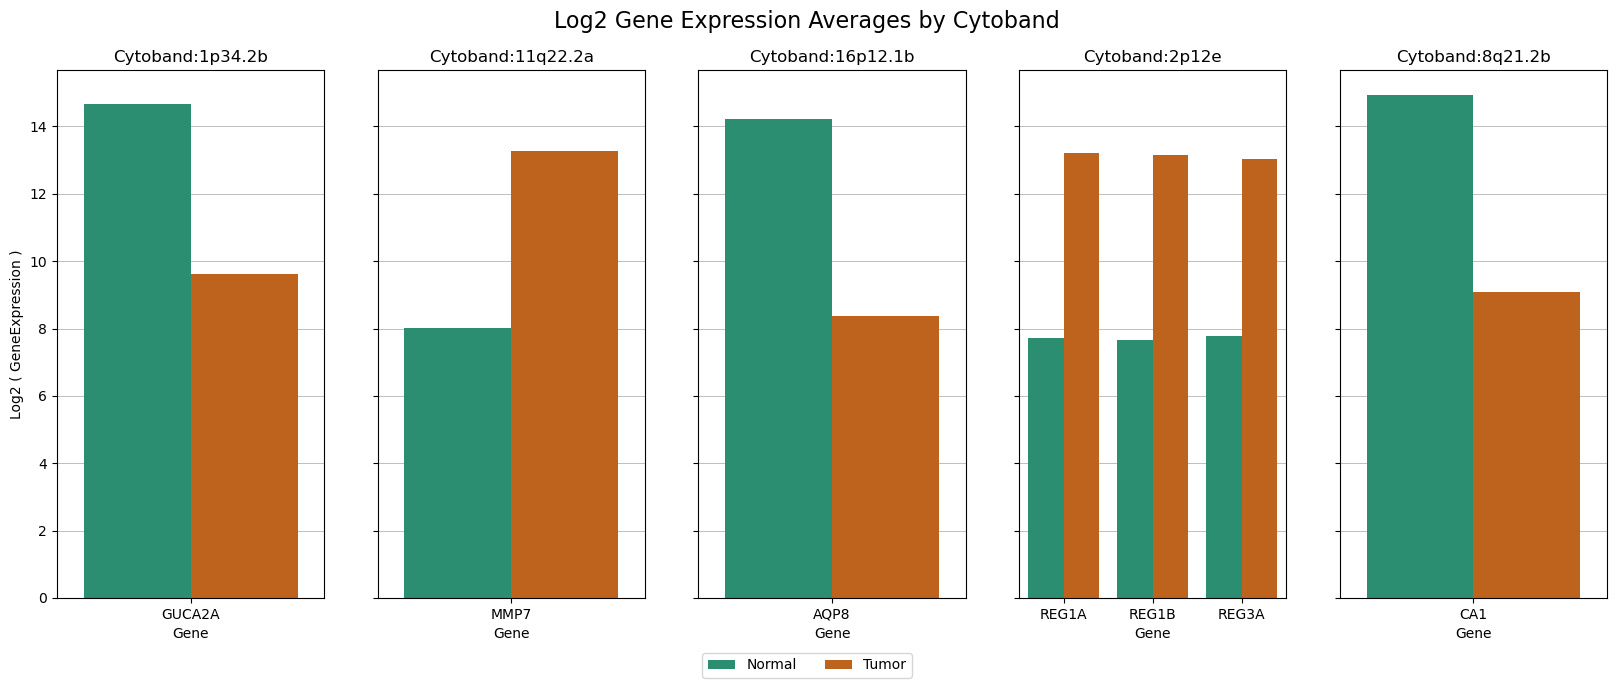

In [37]:
# Goal:
# Create a Large Plot with several sub plots to group all the genes under one cytoband

# First get the number of distinct cytobands to calculate number of necessary subplots
distinct_cytobands = plot_df['Cytoband'].unique()
quantity_subplots = len(distinct_cytobands)

# Begin Building the Figure and Map the Subplots
fig, axes = plt.subplots(
    # Number of Rows & Columns
    nrows = 1, 
    ncols= quantity_subplots, 
    # Scale the Size of the Figure according to the Subplots
    figsize=(4 * quantity_subplots, 6), 
    # Make all the Subplots share the same Y axis
    sharey=True
)

# Per Unique Cytoband, Generate a Subplot
for i, cytoband in enumerate(distinct_cytobands):

    # Filter data for the current cytoband
    distinct_cytoband_df = plot_df[plot_df['Cytoband'] == cytoband]


    # Plot the individual cytoband subplot
    
    # Specify which of the Subplots this Subplot specifically is
    cytoband_plot = axes[i]

    
    # Generate the Actual Bar plot for the Subplot
    sns.barplot(
        # Select the Data for the Subplot
        data = distinct_cytoband_df, 
        # Categorical Label for the Subplot X-Axis
        x = "Gene", 
        # Categorical Label for the Shared Y-Axis
        y = "Log2 ( GeneExpression )",
        # Change Color based on the Tumor/Normal Class
        hue = "Class", 
        # Define the Specific Subplot to Generate this Bar plot On
        ax = cytoband_plot, 
        # Seaborn Color Palettes: https://www.practicalpythonfordatascience.com/ap_seaborn_palette
        palette = 'Dark2'
    )

    # Ensure gridlines are drawn below plot elements
    cytoband_plot.set_axisbelow(True)

    # Add horizontal gridlines
    cytoband_plot.grid(axis='y', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)

    # Remove the legend from each subplot to avoid duplication
    cytoband_plot.legend().set_visible(False)

    # Set the Subplot Title and Major Parameter Ticks
    cytoband_plot.set_title(f'Cytoband:{cytoband}')
    cytoband_plot.tick_params(axis='x')
    
# End of Subplot Loop

# Prepare and place the common legend at the bottom

# Get the Handles (References to the Series) and their Labels for the Legend
handles, labels = axes[0].get_legend_handles_labels()

# Build a Common Legend for all the Subplots
fig.legend(
    # Labels of the Legend
    labels=labels,
    # Colors/Reference to the Series
    handles=handles,
    loc='upper center',
    handlelength=2,
    ncol=2,
    bbox_to_anchor=(0.5, -0.08),
)

# Add a plot Title
fig.suptitle('Log2 Gene Expression Averages by Cytoband', fontsize=16)
# Adjust the layout to make space for the legend
plt.subplots_adjust(bottom=0)  # Increase bottom margin to make space for the legend

# Show the Plot
plt.show()
# Close the Plot
plt.close()

b. Create a histogram showing the distribution of the number of differentially expressed genes (DEGs) by chromosome

c. Make another histogram showing the distribution of DEGs by chromosome segregated by sample type (Normal or Tumor)

d. Create a bar chart showing the percentages of the DEGs that are upregulated (higher) in Tumor samples and down regulated (lower) in Tumor samples

e. Use the raw data from part 1b to create a heatmap visualizing gene expression by sample

f. Use the same data from the previous part to create a clustermap visualizing gene expression by sample

g. Write a few sentence explaining the findings of your analysis, feel free to reference any of visualizations

h. BONUS: Additional embellishments to your visualizations, using matplotlib and/or seaborn functions to make your visualizations more aesthetically pleasing will be rewarded up to 20 extra points

## 3. Documentation
Write a ReadMe file meeting all the requirements described in the first assignment is a prerequisite.
